In [135]:
import numpy as np
from pandas.io.parsers import read_csv

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [125]:
# Formatear datos
data = read_csv("ex1data1.csv", header=None).to_numpy()
X = np.array([data[:, 0]])
Y = np.array([data[:, 1]]).T
m = X.shape[1]
X = np.hstack([np.ones([m, 1]), X.T]) 


In [126]:
# Inicializar distintas variables

Theta = np.array([[0, 0]])
a = 0.01
iter = range(0, 1500)

# Hipotesis
for i in iter:
    h_theta = np.array([np.sum(X * Theta, axis = 1)])
    difference = h_theta.T - Y

    # Funcion de coste
    J_theta = (1/(2 * m) * np.sum(np.square( difference )))
    Theta = Theta - a * (1/m) * np.sum( difference * np.array([X]), axis = 1 )


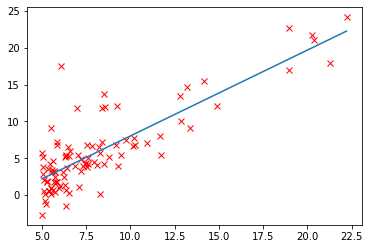

In [127]:
# Visualizar datos
plt.plot([X[:, 1]], [Y[:, 0]], marker='x', c='red')
    
# Visualizar recta

X_min, X_max = np.min(X[:, 1]), np.max(X[:, 1])
Y_min = Theta[:, 0] + Theta[:, 1] * X_min
Y_max = Theta[:, 0] + Theta[:, 1] * X_max
plt.plot([X_min, X_max], [Y_min, Y_max])
plt.show()

In [128]:
def coste(X, Y, Theta):
    h_theta = np.array([np.sum(X * Theta, axis = 1)])
    difference = h_theta.T - Y
    return (1/(2 * len(X)) * np.sum(np.square( difference )))

In [129]:
def make_data(t0_range, t1_range, X, Y):
    """  GENERA LAS MATRICES THETA0, THETA1, COSTE PARA GENERAR UN PLOT EN 3D
    DEL COSTE PARA VALORES DE THETA_0 EN EL INTERVALO T0_RANGE Y VALORES DE THETA_1 EN EL INTERVALO T1_RANGE"""
    step = 0.1
    theta_0 = np.arange(t0_range[0], t0_range[1], step)
    theta_1 = np.arange(t1_range[0], t1_range[1], step)
    
    theta_0, theta_1 = np.meshgrid(theta_0, theta_1)
    Coste = np.empty_like(theta_0)
    
    for ix, iy in np.ndindex(theta_0.shape):
        Coste[ix, iy] = coste(X, Y, [[theta_0[ix, iy], theta_1[ix, iy]]])
        
    return [theta_0, theta_1, Coste]

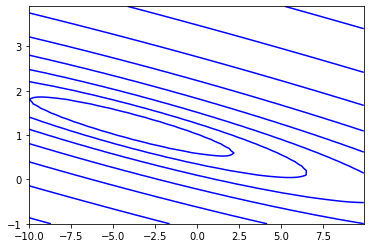

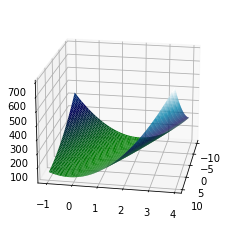

In [163]:
Xx, Yy, Zz = make_data([-10, 10], [-1, 4], X, Y)

plt.contour(Xx, Yy, Zz, np.logspace(-2, 3, 20), colors='blue')
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(20, 10)
ax.plot_surface(Xx, Yy, Zz, cmap = cm.ocean)
plt.show()